In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
FF_2021 = pd.read_excel('LeagueHistory.xlsx', sheet_name='2021') \
            .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Playoffs','Owner','Place'],1) \
            .drop([12],0)
        
labels = np.array(FF_2021['Team_Name'])

FF_2021

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Jasjaap's Primo Team,101.64,108.22,130.12,132.50,145.50,148.94,93.66,88.60,66.56,101.32,141.04,150.28,130.80,160.38,123.66
1,Pay Dirt and Pylons,151.36,163.60,127.04,105.72,132.66,127.26,145.14,104.36,83.18,67.58,111.22,125.90,159.82,187.22,99.58
2,GOBias Industries,93.02,163.80,123.74,162.22,142.46,114.20,122.26,127.16,87.88,100.08,92.10,98.98,139.10,140.54,106.12
3,Brady = Washed Up III,148.38,95.62,113.44,126.08,170.72,115.00,152.10,106.02,132.94,115.46,124.98,107.52,103.78,82.60,92.44
4,Gee Whiz Darnell,154.96,124.02,113.92,105.26,117.08,136.28,114.14,111.48,88.50,111.94,127.28,124.98,118.04,86.30,88.54
5,Sackwash Lyfe,139.66,104.94,87.78,106.04,125.28,105.08,62.48,94.90,123.24,113.52,134.18,119.60,86.92,125.38,80.96
6,Dak to Dak,118.82,51.38,119.32,105.62,145.08,112.00,109.08,94.48,148.38,142.64,123.54,110.20,170.52,125.24,131.28
7,Shiva Volodarskaya,73.10,99.26,117.82,143.22,127.50,115.82,129.54,135.16,97.86,98.84,100.46,147.80,84.50,96.22,96.30
8,Herbin Legends,133.18,100.12,142.70,114.82,139.48,146.38,120.24,113.90,102.44,110.54,96.30,84.78,78.16,137.92,84.40
9,Schmop,91.62,142.18,124.98,127.92,126.78,127.54,99.00,83.50,89.42,100.52,105.02,84.78,128.06,106.10,82.36


In [7]:
averages = np.zeros(15)
for z in range(15):
    averages[z] = np.mean(FF_2021.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(180).reshape(12, 15)
for c in range(15):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF_2021.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([  116.80166667,   230.67833333,   346.04833333,   464.15      ,
         592.645     ,   712.19333333,   824.365     ,   927.86      ,
        1028.14666667,  1134.23      ,  1246.01333333,  1355.79666667,
        1471.68666667,  1591.72833333,  1692.205     ])

In [8]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

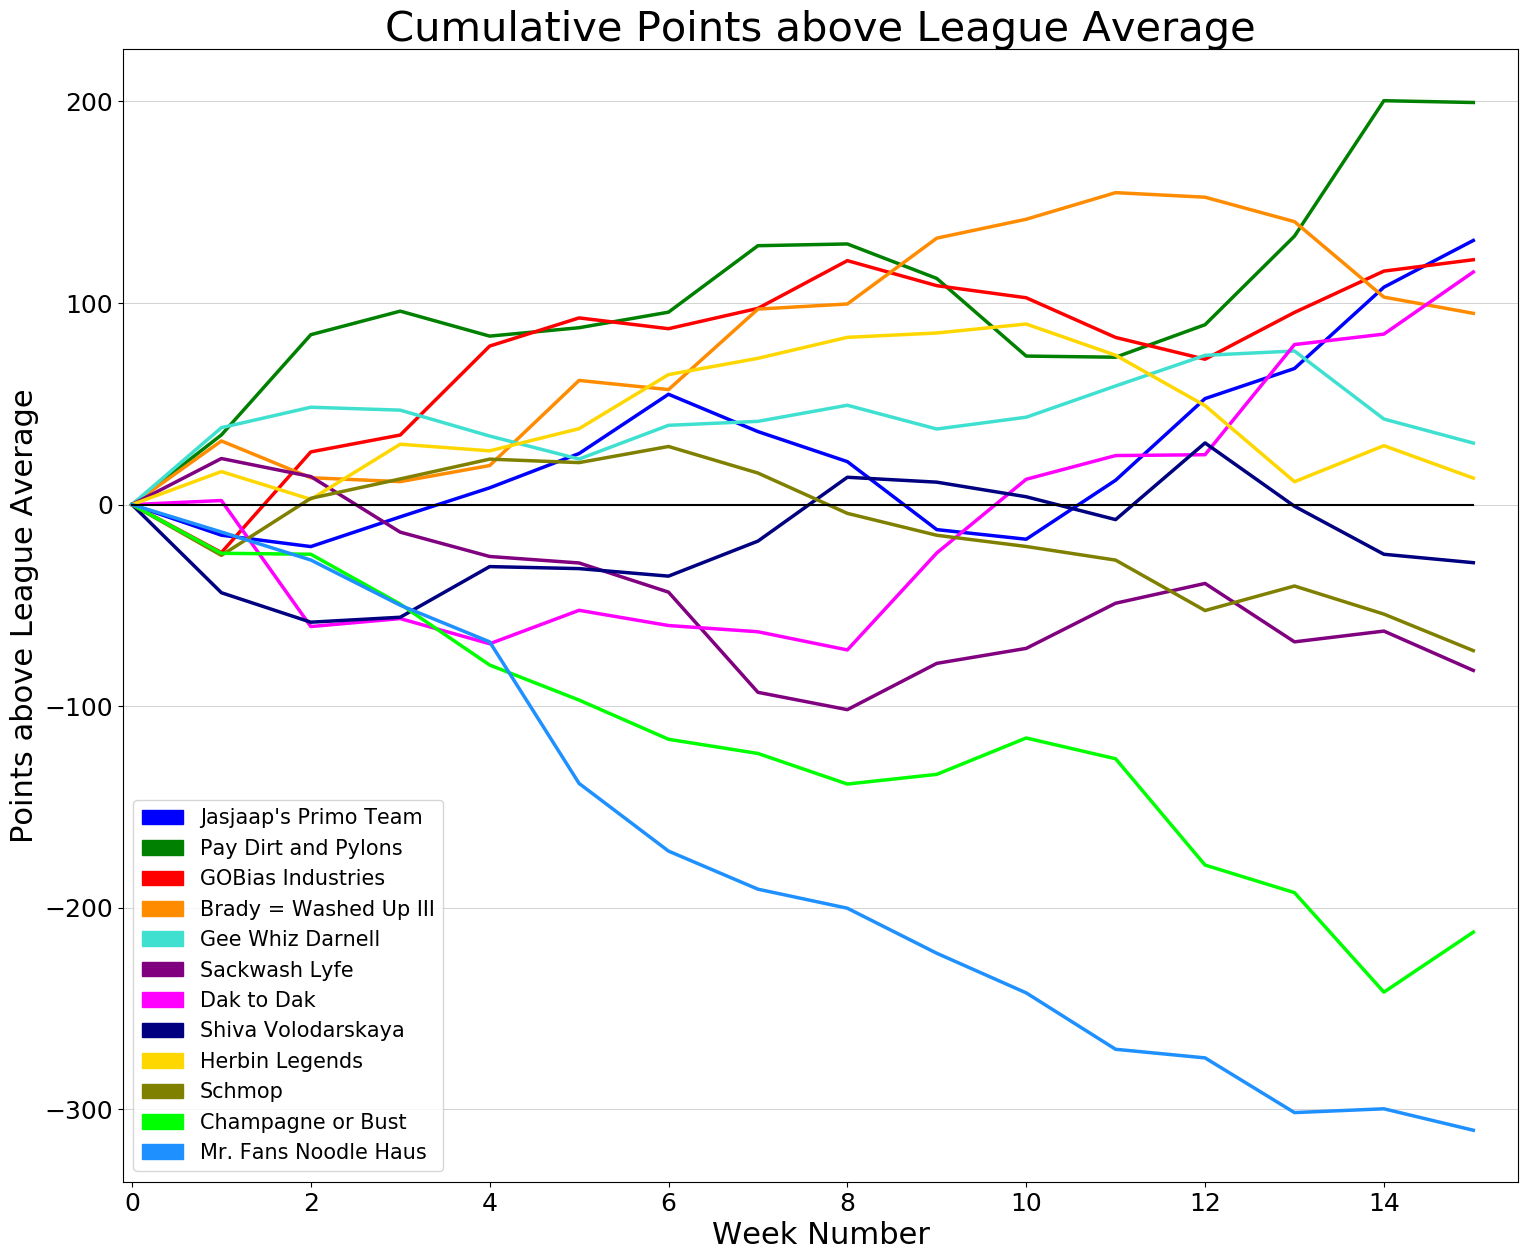

In [10]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,15], [0,0], color = 'k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)